## Deep Fakes-Car Generation - Skunworks Project
By Nikhita Methwani (001492785) 

## Abstract

In this project , We  introduce understanding of GANS for generating fake images. Its network architecture and problem associated with it are covered.We move to Progressive GANS which are found to be better in producing high quality images and introduce the working of Porgressive GANS architecture introduced in Research Paper  https://arxiv.org/abs/1710.10196

The main aim of this project was to research about the working of Progressive GANS on Celeb dataset,understand the functionality of layers and building blocks of the network and reimplement it on car dataset.

The heavy training time of GANS led to the introduction of Google Cloud Platform which is used to train the network to generate the fake cars.

The input dataset was preprocessed to  128 * 128 size for training the network

The reimplementation of standard code is done by changing the required code as per the car dataset specifcation which is explained further in details in the notebook.

The network is trained for 12 hours to generte fake low resolution car images.

The resolution of fake images can be improved further by increasing the training time of the network

## What are GANS ? 


In simple terms , GANS are 2 neural networks having generator and discriminator trying to compete against each other to win the game.    
The generator produces the images from the latent vector(noise) and the discriminator acts as a binary classifier which produces the probabilyt of diffrentiating the real and the fake image given to its input.

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn-images-1.medium.com/max/1200/1*pHOkZ0HJrUSP827-fZFETg.png")

The generator and discriminator follows a min-max game to win the game which can be understood from the below equation:

-θg and θd are just weights of the generator and discriminator networks    
- First Term of the equation - 
- The first term represents the Log probability of the discriminator output with input data from real data distribution    
- Second term - 
- Images from the generator’s output are passed in to the discriminator. So, according to the generator, it has to maximize the chances of the discriminator getting fooled by the generated images. Which means, the generator should want to maximize D(G(z)) Which means, it should look to minimize 1 — D(G(z)) and hence log( 1 — D(G(z)).

In [3]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*361B0UV35Vg7tC8dBuq5Kw.png")

## Research Paper - Progressive GANS:

The research paper suggests that inorder to generate the high quality images , the training of the network should start with 4*4 pixel and the layers should be added in the network smoothly to increase the resolution of the images.This approach improves the quality of generated image along with the increased variatin of the images from the input images.

The network architecture of GANS in the research paper which is implemented on the Car dataset:

In [4]:
Image(url= "https://i.imgur.com/2rQcnH1.png")

The below block diagram illustrates the working of progressive GANS:
The network starts with low resolution images and does the upsampling after each layer for generator with nearst neighbour and 
downsampling for discriminator with average pooling.          
   
toRGB & fromRGB:               
To make a smooth transition to a higher resolution from 16*16 to 32*32, residual blocks (toRGB & fromRGB) are used which allows the effect of 16*16 along with 32*32 pixels and reduces the shock of high fluctuation in pixel size to Neural network. The Residual block also increases the potential of reducing training error as compared to plain Networks, since it allows the weights(alpha) to get updated linearly and reduces the problem of vanishing gradient.

1*1 Convolution layers:             
In Generator: 1*1 convolution layer is used as a fully connected layer, where there are 3 filters of 1*1*16 used for image size of 1024* 1024*16.Since the previous layer channel size is 16, the 1*1 convolution has 16 channels, it does the element wise matrix multiplication of all the 16 channels of the previous layer with the 16 channels(weights) of the filter and applying linear Activation for 1024*1024 image. The layer becomes fully connected because all the 1024*1024*16 gets connected to 3 neurons(filters) of 1*1.
In Discriminator: The 1*1 convolution layer is used as a fromRGB layer and is used to create more channels (16) of 1024*1024 images, which increases the training of neural network.




In [5]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*-lY_AywUNxaWVmdo0qQ5sA.png")

Generator and Discriminator networks:

In [6]:
Image(url= "https://cdn-images-1.medium.com/max/1600/1*tVkpF9gFLuFs1LPfb9oVRw.png")

## Approach for running Progressive GANS Code

The repository : https://github.com/tkarras/progressive_growing_of_gans contains the original code for generating the fake celeb images.The replica of code was used to generate the fake car images


### DataSet Creation:
    The car dataset was downloaded from the stadford.edu and had diffrent image sizes,which were preprocessed to form an image shape of 128*128 to maintain the conistency across the images.This dataset was then followed thorugh few steps before giving it to GANS for training.
    
    



In [7]:
Image(url= "http://mmlab.ie.cuhk.edu.hk/datasets/comp_cars/illustration.png")

#### Preprocessing of dataset

The input dataset of various pixel sizes is resized to 128*128 as shown in the code.The resized images are downloaded in the save_dir

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 10 18:25:34 2019

@author: Nikhita Methwani
"""
### change the input data and resize data directories to yourown:
car_dir = r"D:\MachineLearning-NickBrown\DeepFakes\DeepFakes_Dataset\Car_train"
save_dir = r"D:\MachineLearning-NickBrown\DeepFakes\DeepFakes_Dataset\Car_train_resize"

car_im_list = os.listdir(car_dir)
list_size = np.shape(car_im_list)

for j in range(0,list_size[0]):
    car_im = cv2.cvtColor(cv2.imread(os.path.join(car_dir, car_im_list[j])), cv2.COLOR_BGR2RGB)
    resized_car_im = cv2.resize(car_im, (128, 128))
    save_path = os.path.join(save_dir, car_im_list[j])
    cv2.imwrite(save_path,cv2.cvtColor(resized_car_im, cv2.COLOR_BGR2RGB))

Resized cars

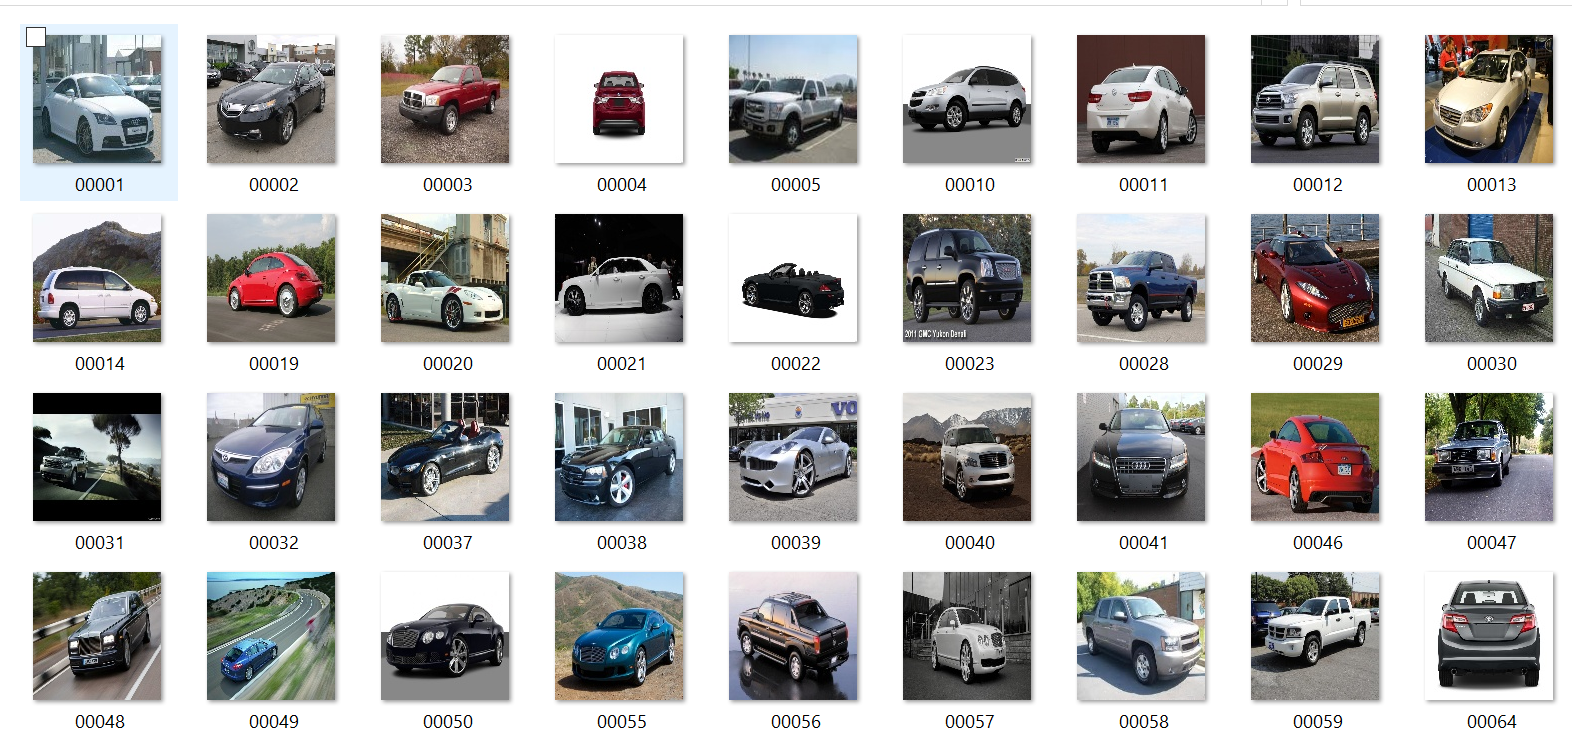

In [22]:
Image(filename="C:/Users/nikhi/OneDrive/Desktop/img/Resized_cars.png" ,width=1000,height=1000)

#### Progressive GANS code:


The train.py file was adjusted as per the car dataset and various changes such as input image dimensions , changes in the directory path ,number of GPUs to run the code were adjusted to run the code

Since the GANS needs high amount of time for image generation , our approach was to shift to Google cloud platform to train the network.

A VM instance was created on the GCP by following the steps mentioned in the link:Running Jupyter Notebook on Google Cloud Platform (Medium) (Anaconda) https://towardsdatascience.com/running-jupyter-notebook-in-google-cloud-platform-in-15-min-61e16da34d52


The entire repository code of GANS found on above link was uploaded on the GCP.

#### GANS code reimplemetation 

The resized dataset was processed again by running the : Python dataset_tool.py create_from_images datasets/car_results ~/downloads/cardataset on cmd.The tf.records zip file was generated which contains the iamges with low to high resolutions reposnible for training the network.
This tf.records zip file was uploaded on the GCP.


The train.py file was changed as per our own dataset as shown below

train.py file:

In [ ]:
# Copyright (c) 2018, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

## The train.py file is used to call the generator and discriminator network and train the networks with the size of input image
## for Car dataset , the input starts with as low as 4*4 and eventually the resolution of images increases in the generation of images by smoothly appending the layers in the network,so that the network is saved from the sudden shocks of transition from low to high resolution.
## Residual blocks of ! * 1 convolution layer are added in the network to obtain the smooth transition.
## The generator network training is started by a latent vector which is upsampled after each convolution layer using nearest neighbor filtering.
## The discriminator network recieves output from generator as well as input image and tries to compare the distribution of the data and updates the weights of generator as required in order to optimize loss function.The discriminator task is to increase the probability of attending 1 at the output which suggests that the image is real and the generator tries to generator the image in such a way that the discriminator doesnt understand if the image is real or fake.


import os
import time
import numpy as np
import tensorflow as tf

import config
import tfutil
import dataset
import misc

#----------------------------------------------------------------------------
# Choose the size and contents of the image snapshot grids that are exported
# periodically during training.

def setup_snapshot_image_grid(G, training_set,
    size    = '1080p',      # '1080p' = to be viewed on 1080p display, '4k' = to be viewed on 4k display.
    layout  = 'random'):    # 'random' = grid contents are selected randomly, 'row_per_class' = each row corresponds to one class label.

    # Select size.
    gw = 1; gh = 1
    if size == '1080p':
        gw = np.clip(1920 // G.output_shape[3], 3, 32)
        gh = np.clip(1080 // G.output_shape[2], 2, 32)
    if size == '4k':
        gw = np.clip(3840 // G.output_shape[3], 7, 32)
        gh = np.clip(2160 // G.output_shape[2], 4, 32)

    # Fill in reals and labels.
    reals = np.zeros([gw * gh] + training_set.shape, dtype=training_set.dtype)
    labels = np.zeros([gw * gh, training_set.label_size], dtype=training_set.label_dtype)
    for idx in range(gw * gh):
        x = idx % gw; y = idx // gw
        while True:
            real, label = training_set.get_minibatch_np(1)
            if layout == 'row_per_class' and training_set.label_size > 0:
                if label[0, y % training_set.label_size] == 0.0:
                    continue
            reals[idx] = real[0]
            labels[idx] = label[0]
            break

    # Generate latents.
    latents = misc.random_latents(gw * gh, G)
    return (gw, gh), reals, labels, latents

#----------------------------------------------------------------------------
# Just-in-time processing of training images before feeding them to the networks.

def process_reals(x, lod, mirror_augment, drange_data, drange_net):
    with tf.name_scope('ProcessReals'):
        with tf.name_scope('DynamicRange'):
            x = tf.cast(x, tf.float32)
            x = misc.adjust_dynamic_range(x, drange_data, drange_net)
        if mirror_augment:
            with tf.name_scope('MirrorAugment'):
                s = tf.shape(x)
                mask = tf.random_uniform([s[0], 1, 1, 1], 0.0, 1.0)
                mask = tf.tile(mask, [1, s[1], s[2], s[3]])
                x = tf.where(mask < 0.5, x, tf.reverse(x, axis=[3]))
        with tf.name_scope('FadeLOD'): # Smooth crossfade between consecutive levels-of-detail.
            s = tf.shape(x)
            y = tf.reshape(x, [-1, s[1], s[2]//2, 2, s[3]//2, 2])
            y = tf.reduce_mean(y, axis=[3, 5], keepdims=True)
            y = tf.tile(y, [1, 1, 1, 2, 1, 2])
            y = tf.reshape(y, [-1, s[1], s[2], s[3]])
            x = tfutil.lerp(x, y, lod - tf.floor(lod))
        with tf.name_scope('UpscaleLOD'): # Upscale to match the expected input/output size of the networks.
            s = tf.shape(x)
            factor = tf.cast(2 ** tf.floor(lod), tf.int32)
            x = tf.reshape(x, [-1, s[1], s[2], 1, s[3], 1])
            x = tf.tile(x, [1, 1, 1, factor, 1, factor])
            x = tf.reshape(x, [-1, s[1], s[2] * factor, s[3] * factor])
        return x

#----------------------------------------------------------------------------
# Class for evaluating and storing the values of time-varying training parameters.

class TrainingSchedule:
    def __init__(
        self,
        cur_nimg,
        training_set,
        lod_initial_resolution  = 4,        # Image resolution used at the beginning.
        lod_training_kimg       = 600,      # Thousands of real images to show before doubling the resolution.
        lod_transition_kimg     = 600,      # Thousands of real images to show when fading in new layers.
        minibatch_base          = 16,       # Maximum minibatch size, divided evenly among GPUs.
        minibatch_dict          = {},       # Resolution-specific overrides.
        max_minibatch_per_gpu   = {},       # Resolution-specific maximum minibatch size per GPU.
        G_lrate_base            = 0.001,    # Learning rate for the generator.
        G_lrate_dict            = {},       # Resolution-specific overrides.
        D_lrate_base            = 0.001,    # Learning rate for the discriminator.
        D_lrate_dict            = {},       # Resolution-specific overrides.
        tick_kimg_base          = 160,      # Default interval of progress snapshots.
        tick_kimg_dict          = {4: 160, 8:140, 16:120, 32:100, 64:80, 128:60, 256:40, 512:20, 1024:10}): # Resolution-specific overrides.

        # Training phase.
        self.kimg = cur_nimg / 1000.0
        phase_dur = lod_training_kimg + lod_transition_kimg
        phase_idx = int(np.floor(self.kimg / phase_dur)) if phase_dur > 0 else 0
        phase_kimg = self.kimg - phase_idx * phase_dur

        # Level-of-detail and resolution.
        self.lod = training_set.resolution_log2
        self.lod -= np.floor(np.log2(lod_initial_resolution))
        self.lod -= phase_idx
        if lod_transition_kimg > 0:
            self.lod -= max(phase_kimg - lod_training_kimg, 0.0) / lod_transition_kimg
        self.lod = max(self.lod, 0.0)
        self.resolution = 2 ** (training_set.resolution_log2 - int(np.floor(self.lod)))

        # Minibatch size.
        self.minibatch = minibatch_dict.get(self.resolution, minibatch_base)
        self.minibatch -= self.minibatch % config.num_gpus
        if self.resolution in max_minibatch_per_gpu:
            self.minibatch = min(self.minibatch, max_minibatch_per_gpu[self.resolution] * config.num_gpus)

        # Other parameters.
        self.G_lrate = G_lrate_dict.get(self.resolution, G_lrate_base)
        self.D_lrate = D_lrate_dict.get(self.resolution, D_lrate_base)
        self.tick_kimg = tick_kimg_dict.get(self.resolution, tick_kimg_base)

#----------------------------------------------------------------------------
# Main training script.
# To run, comment/uncomment appropriate lines in config.py and launch train.py.

## Steps performed in the notebook:

# The images are preprocessed in the format acceptable by the network
# Learning rates of generator and discriminator are set to 0.001
# Hyperparmaeter are set as below and the network is constructed
# Generator and Discriminator networks are called by passing the input shape of the dataset



def train_progressive_gan(
    G_smoothing             = 0.999,        # Exponential running average of generator weights.
    D_repeats               = 1,            # How many times the discriminator is trained per G iteration.
    minibatch_repeats       = 4,            # Number of minibatches to run before adjusting training parameters.
    reset_opt_for_new_lod   = True,         # Reset optimizer internal state (e.g. Adam moments) when new layers are introduced?
    total_kimg              = 15000,        # Total length of the training, measured in thousands of real images.
    mirror_augment          = False,        # Enable mirror augment?
    drange_net              = [-1,1],       # Dynamic range used when feeding image data to the networks.
    image_snapshot_ticks    = 1,            # How often to export image snapshots?
    network_snapshot_ticks  = 10,           # How often to export network snapshots?
    save_tf_graph           = False,        # Include full TensorFlow computation graph in the tfevents file?
    save_weight_histograms  = False,        # Include weight histograms in the tfevents file?
    resume_run_id           = None,         # Run ID or network pkl to resume training from, None = start from scratch.
    resume_snapshot         = None,         # Snapshot index to resume training from, None = autodetect.
    resume_kimg             = 0.0,          # Assumed training progress at the beginning. Affects reporting and training schedule.
    resume_time             = 0.0):         # Assumed wallclock time at the beginning. Affects reporting.

    maintenance_start_time = time.time()
    training_set = dataset.load_dataset(data_dir=config.data_dir, verbose=True, **config.dataset)

    # Construct networks.
    with tf.device('/gpu:0'):
        if resume_run_id is not None:
            network_pkl = misc.locate_network_pkl(resume_run_id, resume_snapshot)
            print('Loading networks from "%s"...' % network_pkl)
            G, D, Gs = misc.load_pkl(network_pkl)
        else:
            print('Constructing networks...')
            G = tfutil.Network('G', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **config.G)
            D = tfutil.Network('D', num_channels=training_set.shape[0], resolution=training_set.shape[1], label_size=training_set.label_size, **config.D)
            Gs = G.clone('Gs')
        Gs_update_op = Gs.setup_as_moving_average_of(G, beta=G_smoothing)
    G.print_layers(); D.print_layers()

    print('Building TensorFlow graph...')
    with tf.name_scope('Inputs'):
        lod_in          = tf.placeholder(tf.float32, name='lod_in', shape=[])
        lrate_in        = tf.placeholder(tf.float32, name='lrate_in', shape=[])
        minibatch_in    = tf.placeholder(tf.int32, name='minibatch_in', shape=[])
        minibatch_split = minibatch_in // config.num_gpus
        reals, labels   = training_set.get_minibatch_tf()
        reals_split     = tf.split(reals, config.num_gpus)
        labels_split    = tf.split(labels, config.num_gpus)
    G_opt = tfutil.Optimizer(name='TrainG', learning_rate=lrate_in, **config.G_opt)
    D_opt = tfutil.Optimizer(name='TrainD', learning_rate=lrate_in, **config.D_opt)
    for gpu in range(config.num_gpus):
        with tf.name_scope('GPU%d' % gpu), tf.device('/gpu:%d' % gpu):
            G_gpu = G if gpu == 0 else G.clone(G.name + '_shadow')
            D_gpu = D if gpu == 0 else D.clone(D.name + '_shadow')
            lod_assign_ops = [tf.assign(G_gpu.find_var('lod'), lod_in), tf.assign(D_gpu.find_var('lod'), lod_in)]
            reals_gpu = process_reals(reals_split[gpu], lod_in, mirror_augment, training_set.dynamic_range, drange_net)
            labels_gpu = labels_split[gpu]
            with tf.name_scope('G_loss'), tf.control_dependencies(lod_assign_ops):
                G_loss = tfutil.call_func_by_name(G=G_gpu, D=D_gpu, opt=G_opt, training_set=training_set, minibatch_size=minibatch_split, **config.G_loss)
            with tf.name_scope('D_loss'), tf.control_dependencies(lod_assign_ops):
                D_loss = tfutil.call_func_by_name(G=G_gpu, D=D_gpu, opt=D_opt, training_set=training_set, minibatch_size=minibatch_split, reals=reals_gpu, labels=labels_gpu, **config.D_loss)
            G_opt.register_gradients(tf.reduce_mean(G_loss), G_gpu.trainables)
            D_opt.register_gradients(tf.reduce_mean(D_loss), D_gpu.trainables)
    G_train_op = G_opt.apply_updates()
    D_train_op = D_opt.apply_updates()

    print('Setting up snapshot image grid...')
    grid_size, grid_reals, grid_labels, grid_latents = setup_snapshot_image_grid(G, training_set, **config.grid)
    sched = TrainingSchedule(total_kimg * 1000, training_set, **config.sched)
    grid_fakes = Gs.run(grid_latents, grid_labels, minibatch_size=sched.minibatch//config.num_gpus)

    print('Setting up result dir...')
    result_subdir = misc.create_result_subdir(config.result_dir, config.desc)
    misc.save_image_grid(grid_reals, os.path.join(result_subdir, 'reals.png'), drange=training_set.dynamic_range, grid_size=grid_size)
    misc.save_image_grid(grid_fakes, os.path.join(result_subdir, 'fakes%06d.png' % 0), drange=drange_net, grid_size=grid_size)
    summary_log = tf.summary.FileWriter(result_subdir)
    if save_tf_graph:
        summary_log.add_graph(tf.get_default_graph())
    if save_weight_histograms:
        G.setup_weight_histograms(); D.setup_weight_histograms()

    print('Training...')
    cur_nimg = int(resume_kimg * 1000)
    cur_tick = 0
    tick_start_nimg = cur_nimg
    tick_start_time = time.time()
    train_start_time = tick_start_time - resume_time
    prev_lod = -1.0
    while cur_nimg < total_kimg * 1000:

        # Choose training parameters and configure training ops.
        sched = TrainingSchedule(cur_nimg, training_set, **config.sched)
        training_set.configure(sched.minibatch, sched.lod)
        if reset_opt_for_new_lod:
            if np.floor(sched.lod) != np.floor(prev_lod) or np.ceil(sched.lod) != np.ceil(prev_lod):
                G_opt.reset_optimizer_state(); D_opt.reset_optimizer_state()
        prev_lod = sched.lod

        # Run training ops.
        for repeat in range(minibatch_repeats):
            for _ in range(D_repeats):
                tfutil.run([D_train_op, Gs_update_op], {lod_in: sched.lod, lrate_in: sched.D_lrate, minibatch_in: sched.minibatch})
                cur_nimg += sched.minibatch
            tfutil.run([G_train_op], {lod_in: sched.lod, lrate_in: sched.G_lrate, minibatch_in: sched.minibatch})

        # Perform maintenance tasks once per tick.
        done = (cur_nimg >= total_kimg * 1000)
        if cur_nimg >= tick_start_nimg + sched.tick_kimg * 1000 or done:
            cur_tick += 1
            cur_time = time.time()
            tick_kimg = (cur_nimg - tick_start_nimg) / 1000.0
            tick_start_nimg = cur_nimg
            tick_time = cur_time - tick_start_time
            total_time = cur_time - train_start_time
            maintenance_time = tick_start_time - maintenance_start_time
            maintenance_start_time = cur_time

            # Report progress.
            print('tick %-5d kimg %-8.1f lod %-5.2f minibatch %-4d time %-12s sec/tick %-7.1f sec/kimg %-7.2f maintenance %.1f' % (
                tfutil.autosummary('Progress/tick', cur_tick),
                tfutil.autosummary('Progress/kimg', cur_nimg / 1000.0),
                tfutil.autosummary('Progress/lod', sched.lod),
                tfutil.autosummary('Progress/minibatch', sched.minibatch),
                misc.format_time(tfutil.autosummary('Timing/total_sec', total_time)),
                tfutil.autosummary('Timing/sec_per_tick', tick_time),
                tfutil.autosummary('Timing/sec_per_kimg', tick_time / tick_kimg),
                tfutil.autosummary('Timing/maintenance_sec', maintenance_time)))
            tfutil.autosummary('Timing/total_hours', total_time / (60.0 * 60.0))
            tfutil.autosummary('Timing/total_days', total_time / (24.0 * 60.0 * 60.0))
            tfutil.save_summaries(summary_log, cur_nimg)

            # Save snapshots.
            if cur_tick % image_snapshot_ticks == 0 or done:
                grid_fakes = Gs.run(grid_latents, grid_labels, minibatch_size=sched.minibatch//config.num_gpus)
                misc.save_image_grid(grid_fakes, os.path.join(result_subdir, 'fakes%06d.png' % (cur_nimg // 1000)), drange=drange_net, grid_size=grid_size)
            if cur_tick % network_snapshot_ticks == 0 or done:
                misc.save_pkl((G, D, Gs), os.path.join(result_subdir, 'network-snapshot-%06d.pkl' % (cur_nimg // 1000)))

            # Record start time of the next tick.
            tick_start_time = time.time()

    # Write final results.
    misc.save_pkl((G, D, Gs), os.path.join(result_subdir, 'network-final.pkl'))
    summary_log.close()
    open(os.path.join(result_subdir, '_training-done.txt'), 'wt').close()

#----------------------------------------------------------------------------
# Main entry point.
# Calls the function indicated in config.py.

if __name__ == "__main__":
    misc.init_output_logging()
    np.random.seed(config.random_seed)
    print('Initializing TensorFlow...')
    os.environ.update(config.env)
    tfutil.init_tf(config.tf_config)
    print('Running %s()...' % config.train['func'])
    tfutil.call_func_by_name(**config.train)
    print('Exiting...')

#----------------------------------------------------------------------------


config.py

Change the dataset names to car dataset

In [ ]:
# Copyright (c) 2018, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

#----------------------------------------------------------------------------
# Convenience class that behaves exactly like dict(), but allows accessing
# the keys and values using the attribute syntax, i.e., "mydict.key = value".

class EasyDict(dict):
    def __init__(self, *args, **kwargs): super().__init__(*args, **kwargs)
    def __getattr__(self, name): return self[name]
    def __setattr__(self, name, value): self[name] = value
    def __delattr__(self, name): del self[name]

#----------------------------------------------------------------------------
# Paths.

#data_dir = 'datasets'
data_dir = 'Create_DF-r04.tfrecords'
result_dir = 'results'

#----------------------------------------------------------------------------
# TensorFlow options.

tf_config = EasyDict()  # TensorFlow session config, set by tfutil.init_tf().
env = EasyDict()        # Environment variables, set by the main program in train.py.

tf_config['graph_options.place_pruned_graph']   = True      # False (default) = Check that all ops are available on the designated device. True = Skip the check for ops that are not used.
#tf_config['gpu_options.allow_growth']          = False     # False (default) = Allocate all GPU memory at the beginning. True = Allocate only as much GPU memory as needed.
#env.CUDA_VISIBLE_DEVICES                       = '0'       # Unspecified (default) = Use all available GPUs. List of ints = CUDA device numbers to use.
env.TF_CPP_MIN_LOG_LEVEL                        = '1'       # 0 (default) = Print all available debug info from TensorFlow. 1 = Print warnings and errors, but disable debug info.

#----------------------------------------------------------------------------
# Official training configs, targeted mainly for CelebA-HQ.
# To run, comment/uncomment the lines as appropriate and launch train.py.

desc        = 'pgan'                                        # Description string included in result subdir name.
random_seed = 1000                                          # Global random seed.
dataset     = EasyDict()                                    # Options for dataset.load_dataset().
train       = EasyDict(func='train.train_progressive_gan')  # Options for main training func.
G           = EasyDict(func='networks.G_paper')             # Options for generator network.
D           = EasyDict(func='networks.D_paper')             # Options for discriminator network.
G_opt       = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8) # Options for generator optimizer.
D_opt       = EasyDict(beta1=0.0, beta2=0.99, epsilon=1e-8) # Options for discriminator optimizer.
G_loss      = EasyDict(func='loss.G_wgan_acgan')            # Options for generator loss.
D_loss      = EasyDict(func='loss.D_wgangp_acgan')          # Options for discriminator loss.
sched       = EasyDict()                                    # Options for train.TrainingSchedule.
grid        = EasyDict(size='1080p', layout='random')       # Options for train.setup_snapshot_image_grid().

# Dataset (choose one).
#desc += '-celebahq';            dataset = EasyDict(tfrecord_dir='celebahq'); train.mirror_augment = True
#desc += '-celeba';              dataset = EasyDict(tfrecord_dir='celeba'); train.mirror_augment = True
#desc += '-cifar10';             dataset = EasyDict(tfrecord_dir='cifar10')
#desc += '-cifar100';            dataset = EasyDict(tfrecord_dir='cifar100')
#desc += '-svhn';                dataset = EasyDict(tfrecord_dir='svhn')
#desc += '-mnist';               dataset = EasyDict(tfrecord_dir='mnist')
#desc += '-mnistrgb';            dataset = EasyDict(tfrecord_dir='mnistrgb')
desc += '-syn1024rgb';          dataset = EasyDict(class_name='dataset.SyntheticDataset', resolution=128, num_channels=3)
#desc += '-lsun-airplane';       dataset = EasyDict(tfrecord_dir='lsun-airplane-100k');       train.mirror_augment = True
#desc += '-lsun-bedroom';        dataset = EasyDict(tfrecord_dir='lsun-bedroom-100k');        train.mirror_augment = True
#desc += '-lsun-bicycle';        dataset = EasyDict(tfrecord_dir='lsun-bicycle-100k');        train.mirror_augment = True
#desc += '-lsun-bird';           dataset = EasyDict(tfrecord_dir='lsun-bird-100k');           train.mirror_augment = True
#desc += '-lsun-boat';           dataset = EasyDict(tfrecord_dir='lsun-boat-100k');           train.mirror_augment = True
#desc += '-lsun-bottle';         dataset = EasyDict(tfrecord_dir='lsun-bottle-100k');         train.mirror_augment = True
#desc += '-lsun-bridge';         dataset = EasyDict(tfrecord_dir='lsun-bridge-100k');         train.mirror_augment = True
#desc += '-lsun-bus';            dataset = EasyDict(tfrecord_dir='lsun-bus-100k');            train.mirror_augment = True
#desc += '-lsun-car';            dataset = EasyDict(tfrecord_dir='lsun-car-100k');            train.mirror_augment = True
#desc += '-lsun-cat';            dataset = EasyDict(tfrecord_dir='lsun-cat-100k');            train.mirror_augment = True
#desc += '-lsun-chair';          dataset = EasyDict(tfrecord_dir='lsun-chair-100k');          train.mirror_augment = True
#desc += '-lsun-churchoutdoor';  dataset = EasyDict(tfrecord_dir='lsun-churchoutdoor-100k');  train.mirror_augment = True
#desc += '-lsun-classroom';      dataset = EasyDict(tfrecord_dir='lsun-classroom-100k');      train.mirror_augment = True
#desc += '-lsun-conferenceroom'; dataset = EasyDict(tfrecord_dir='lsun-conferenceroom-100k'); train.mirror_augment = True
#desc += '-lsun-cow';            dataset = EasyDict(tfrecord_dir='lsun-cow-100k');            train.mirror_augment = True
#desc += '-lsun-diningroom';     dataset = EasyDict(tfrecord_dir='lsun-diningroom-100k');     train.mirror_augment = True
#desc += '-lsun-diningtable';    dataset = EasyDict(tfrecord_dir='lsun-diningtable-100k');    train.mirror_augment = True
#desc += '-lsun-dog';            dataset = EasyDict(tfrecord_dir='lsun-dog-100k');            train.mirror_augment = True
#desc += '-lsun-horse';          dataset = EasyDict(tfrecord_dir='lsun-horse-100k');          train.mirror_augment = True
#desc += '-lsun-kitchen';        dataset = EasyDict(tfrecord_dir='lsun-kitchen-100k');        train.mirror_augment = True
#desc += '-lsun-livingroom';     dataset = EasyDict(tfrecord_dir='lsun-livingroom-100k');     train.mirror_augment = True
#desc += '-lsun-motorbike';      dataset = EasyDict(tfrecord_dir='lsun-motorbike-100k');      train.mirror_augment = True
#desc += '-lsun-person';         dataset = EasyDict(tfrecord_dir='lsun-person-100k');         train.mirror_augment = True
#desc += '-lsun-pottedplant';    dataset = EasyDict(tfrecord_dir='lsun-pottedplant-100k');    train.mirror_augment = True
#desc += '-lsun-restaurant';     dataset = EasyDict(tfrecord_dir='lsun-restaurant-100k');     train.mirror_augment = True
#desc += '-lsun-sheep';          dataset = EasyDict(tfrecord_dir='lsun-sheep-100k');          train.mirror_augment = True
#desc += '-lsun-sofa';           dataset = EasyDict(tfrecord_dir='lsun-sofa-100k');           train.mirror_augment = True
#desc += '-lsun-tower';          dataset = EasyDict(tfrecord_dir='lsun-tower-100k');          train.mirror_augment = True
#desc += '-lsun-train';          dataset = EasyDict(tfrecord_dir='lsun-train-100k');          train.mirror_augment = True
#desc += '-lsun-tvmonitor';      dataset = EasyDict(tfrecord_dir='lsun-tvmonitor-100k');      train.mirror_augment = True

# Conditioning & snapshot options.
#desc += '-cond'; dataset.max_label_size = 'full' # conditioned on full label
#desc += '-cond1'; dataset.max_label_size = 1 # conditioned on first component of the label
#desc += '-g4k'; grid.size = '4k'
#desc += '-grpc'; grid.layout = 'row_per_class'

# Config presets (choose one).
#desc += '-preset-v1-1gpu'; num_gpus = 1; D.mbstd_group_size = 16; sched.minibatch_base = 16; sched.minibatch_dict = {256: 14, 512: 6, 1024: 3}; sched.lod_training_kimg = 800; sched.lod_transition_kimg = 800; train.total_kimg = 19000
#desc += '-preset-v2-1gpu'; num_gpus = 1; sched.minibatch_base = 4; sched.minibatch_dict = {4: 128, 8: 128, 16: 128, 32: 64, 64: 32, 128: 16, 256: 8, 512: 4}; sched.G_lrate_dict = {1024: 0.0015}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000
#desc += '-preset-v2-2gpus'; num_gpus = 2; sched.minibatch_base = 8; sched.minibatch_dict = {4: 256, 8: 256, 16: 128, 32: 64, 64: 32, 128: 16, 256: 8}; sched.G_lrate_dict = {512: 0.0015, 1024: 0.002}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000
desc += '-preset-v2-4gpus'; num_gpus = 4; sched.minibatch_base = 16; sched.minibatch_dict = {4: 512, 8: 256, 16: 128, 32: 64, 64: 32, 128: 16}; sched.G_lrate_dict = {256: 0.0015, 512: 0.002, 1024: 0.003}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000
#desc += '-preset-v2-8gpus'; num_gpus = 8; sched.minibatch_base = 32; sched.minibatch_dict = {4: 512, 8: 256, 16: 128, 32: 64, 64: 32}; sched.G_lrate_dict = {128: 0.0015, 256: 0.002, 512: 0.003, 1024: 0.003}; sched.D_lrate_dict = EasyDict(sched.G_lrate_dict); train.total_kimg = 12000

# Numerical precision (choose one).
desc += '-fp32'; sched.max_minibatch_per_gpu = {256: 16, 512: 8, 1024: 4}
#desc += '-fp16'; G.dtype = 'float16'; D.dtype = 'float16'; G.pixelnorm_epsilon=1e-4; G_opt.use_loss_scaling = True; D_opt.use_loss_scaling = True; sched.max_minibatch_per_gpu = {512: 16, 1024: 8}

# Disable individual features.
#desc += '-nogrowing'; sched.lod_initial_resolution = 1024; sched.lod_training_kimg = 0; sched.lod_transition_kimg = 0; train.total_kimg = 10000
#desc += '-nopixelnorm'; G.use_pixelnorm = False
#desc += '-nowscale'; G.use_wscale = False; D.use_wscale = False
#desc += '-noleakyrelu'; G.use_leakyrelu = False
#desc += '-nosmoothing'; train.G_smoothing = 0.0
#desc += '-norepeat'; train.minibatch_repeats = 1
#desc += '-noreset'; train.reset_opt_for_new_lod = False



#----------------------------------------------------------------------------
# Utility scripts.
# To run, uncomment the appropriate line and launch train.py.

#train = EasyDict(func='util_scripts.generate_fake_images', run_id=23, num_pngs=1000); num_gpus = 1; desc = 'fake-images-' + str(train.run_id)
train = EasyDict(func='util_scripts.generate_fake_images', run_id=23, grid_size=[15,8], num_pngs=10, image_shrink=4); num_gpus = 1; desc = 'fake-grids-' + str(train.run_id)


#----------------------------------------------------------------------------


#### GCP (Google Cloud Platform)

Now the GCP contains the below file:   
1) The progressive GANS changed code as per our requirment and dataset     
2) The tf.records dataset  

Deploy the SSH cloud shell after installing the jupter notebooks and required libraries as mentioned in the above cells




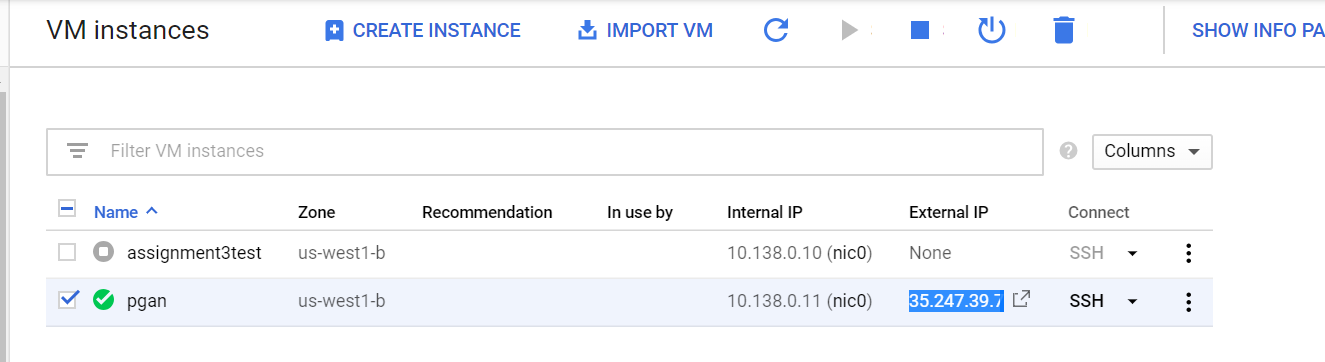

In [18]:
Image(filename="C:/Users/nikhi/OneDrive/Desktop/img/Vm.png" ,width=1000,height=1000)

### Real Image generated by the network to compare with the generated Image

The network creates one refrece image which discriminator tries to compare with the generated image.

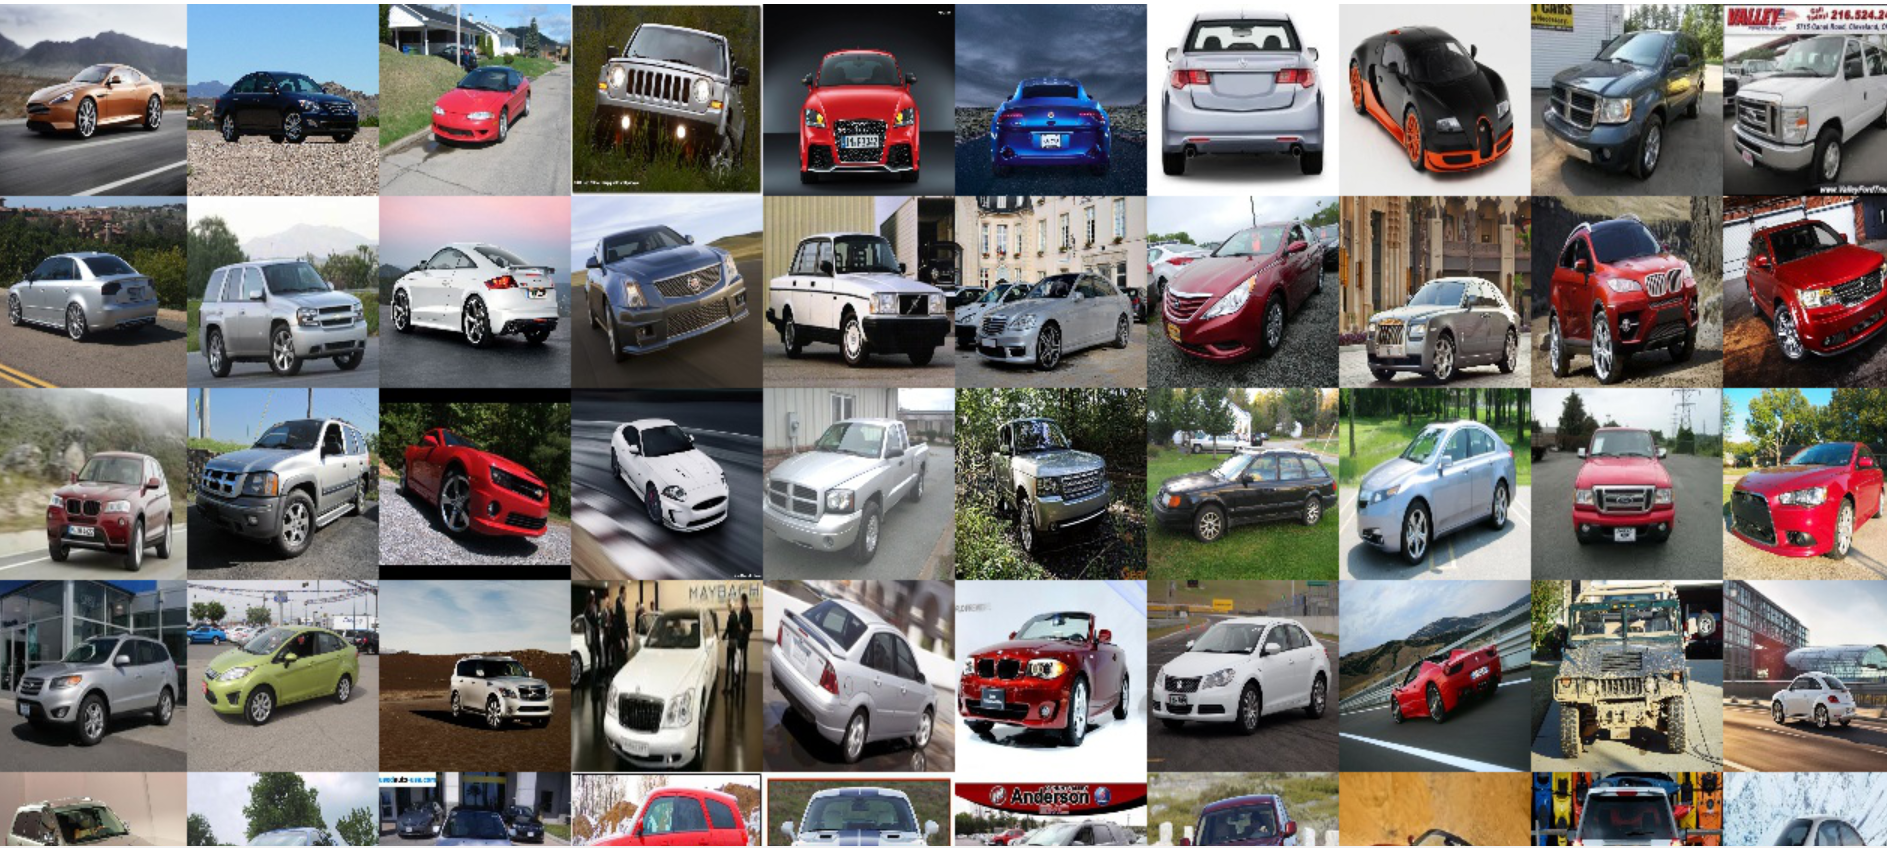

In [24]:
Image(filename="C:/Users/nikhi/OneDrive/Desktop/img/realimage.png" ,width=1000,height=1000)

## Results of Generated Fake Cars 

Run the SSH shell with the below command:
    python3 train.py
    
The network will start the training and continues till you stop it.


Below are the results generated after 12 hours of continous training:
Refrence image generated by the Netwok:

#### Log file

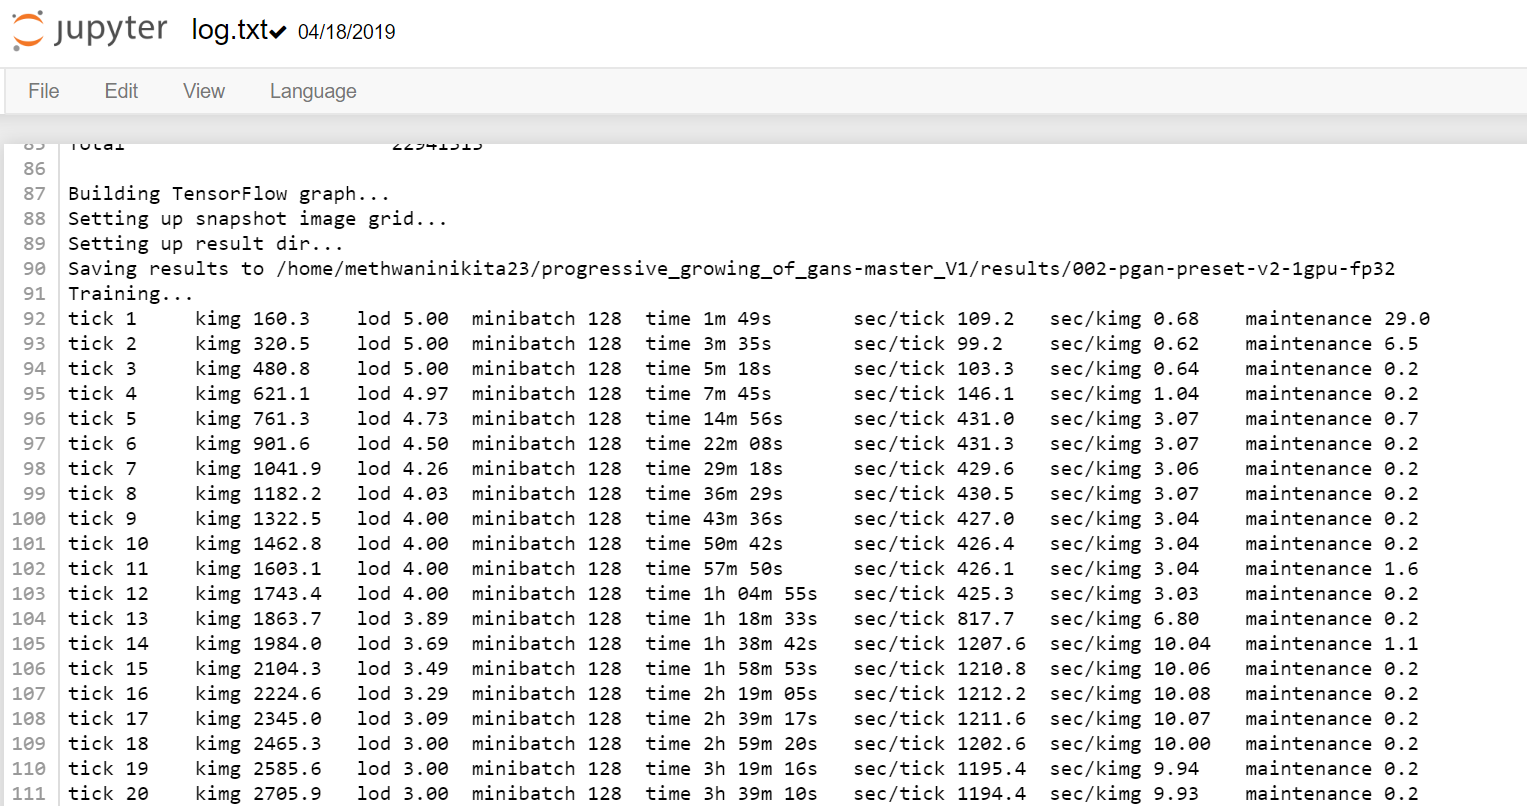

In [20]:
Image(filename="C:/Users/nikhi/OneDrive/Desktop/img/logfile.png" ,width=1000,height=1000)

Training & Results 

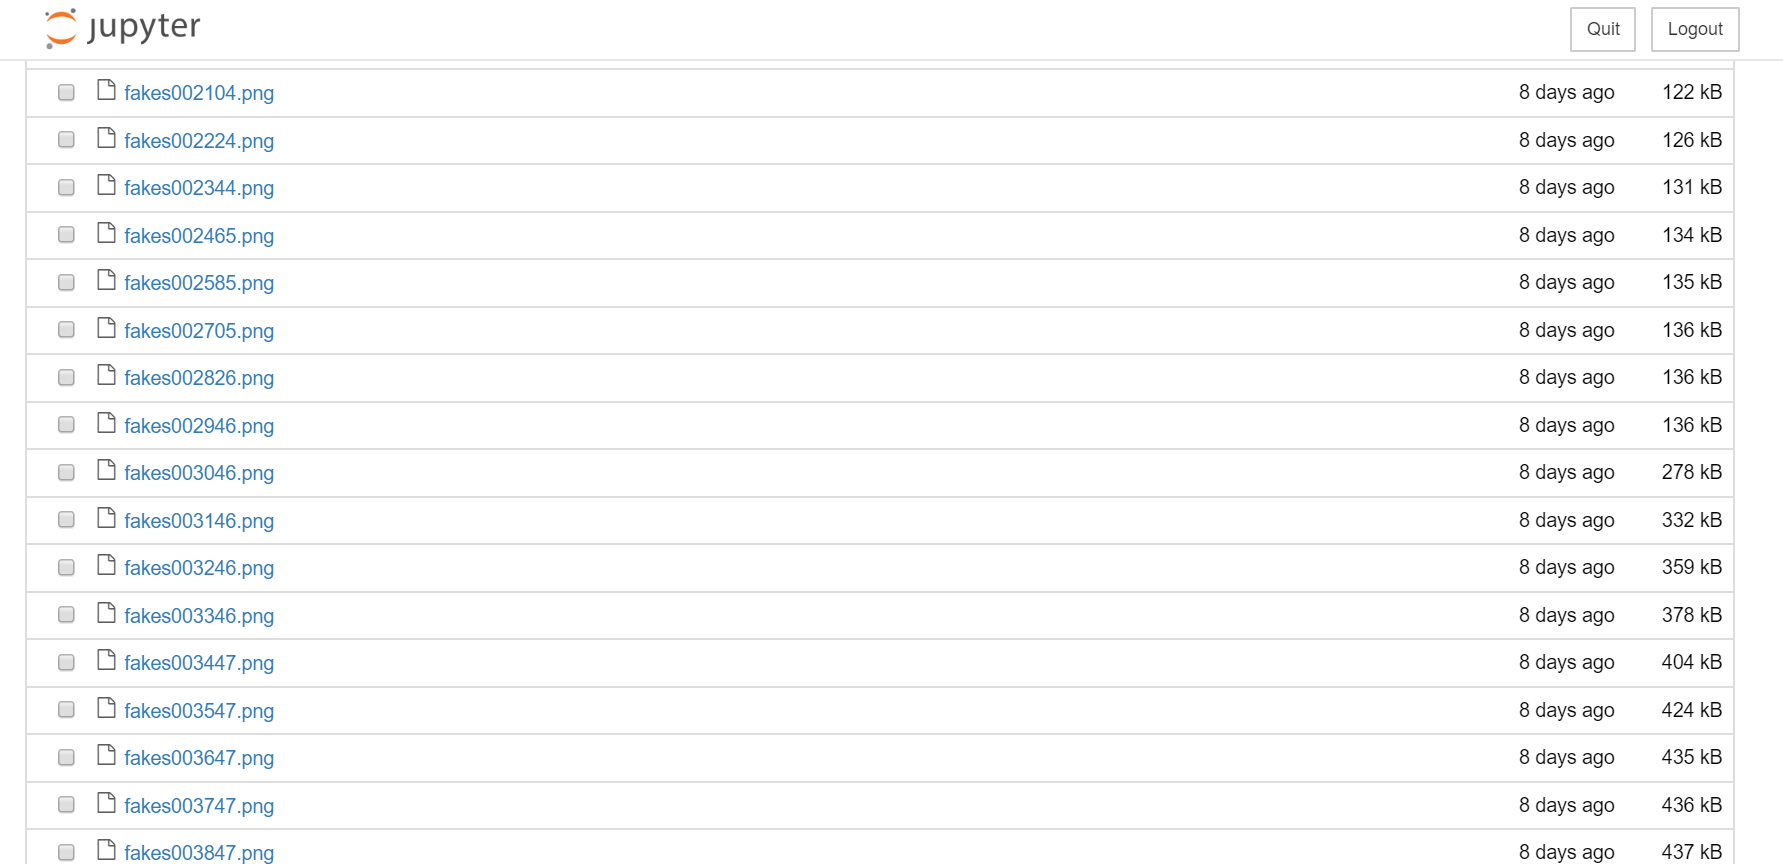

In [23]:
Image(filename="C:/Users/nikhi/OneDrive/Desktop/img/training&results.png" ,width=1000,height=1000)

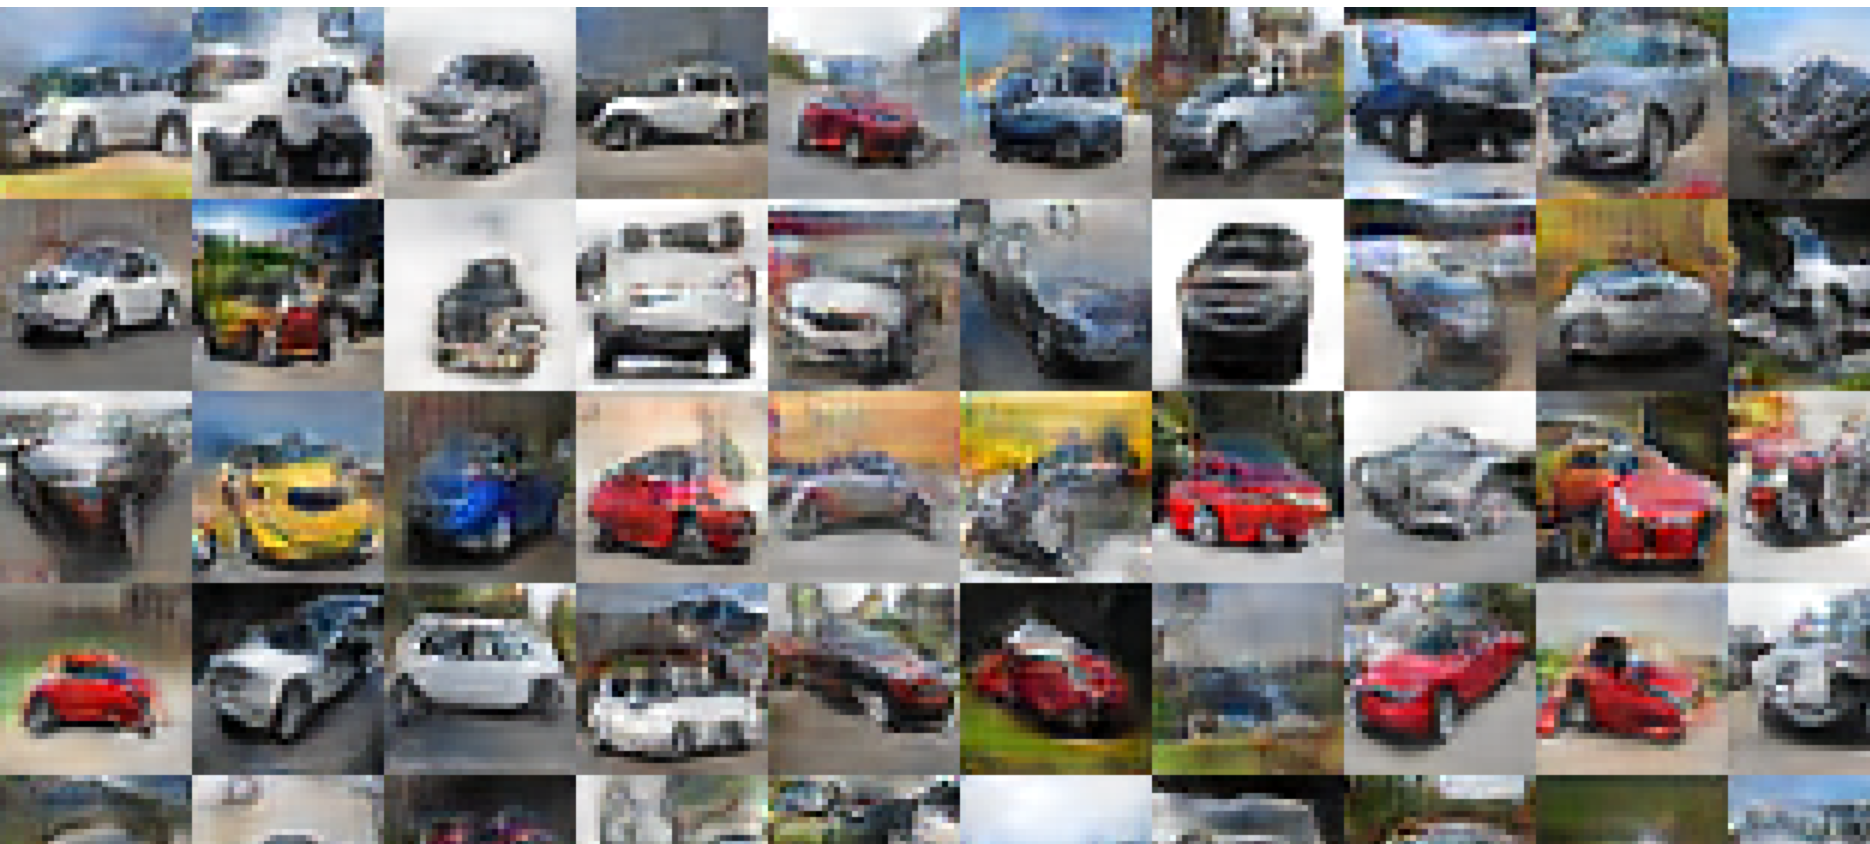

In [17]:
Image(filename="C:/Users/nikhi/OneDrive/Desktop/img/fakecar.png" ,width=1000,height=1000)

## Conclusion 

Though the results generated are of very low resolution, this project implemented the understanding of Progressive GANS using custom dataset. Analyzing the Network functioning, structure and layers of neural network and implementation of GANS on GCP helped to produce fake like images. The low resolution of the imaged could be due to the less training time for converging. The training time can be increased further along with the use of Style based generator network which uses various factors to introduce styles in the generated image.

## Citation

Code for Progressive GANS : https://github.com/tkarras/progressive_growing_of_gans                    
video on generative models: https://www.youtube.com/watch?v=5WoItGTWV54      
Paper on style-based GANs: https://arxiv.org/pdf/1812.04948.pdf                 
Article on Style-Based GANs: https://www.lyrn.ai/2018/12/26/a-style-based-generator-architecture-for-generative-adversarial-networks/                 
Paper on Progressive GANs: https://arxiv.org/abs/1710.10196                     
Code for progressive GANs: https://github.com/tkarras/progressive_growing_of_gans                    
Details about GANS : https://www.floydhub.com/diegoalejogm/projects/gans/10/output/1.%20Vanilla%20GAN%20TensorFlow.ipynb       
Undersatding min-max equation : https://www.analyticsvidhya.com/blog/2017/06/introductory-generative-adversarial-networks-gans/           
Mode Collapse issue in GANS:  https://medium.com/@jonathan_hui/gan-why-it-is-so-hard-to-train-generative-advisory-networks-819a86b3750b                 
        
     

## Contribution : 



The Progressive GANS code was referred from the https://github.com/tkarras/progressive_growing_of_gans and changes as per Car dataset was done as described above to generate the fake car images

## License
Copyright 2019 Nikhita Methwani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.